In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F
%matplotlib inline

In [ ]:
torch.__version__

'1.12.1+cu113'

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/mtcars.csv")

In [ ]:
del df['Unnamed: 0']
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
torch.manual_seed(1234)    # reproducible

In [ ]:
x = torch.unsqueeze(torch.from_numpy(np.array(df.qsec)),dim=1)
y = torch.unsqueeze(torch.from_numpy(np.array(df.mpg)),dim=1)

In [ ]:
x[0:10]

tensor([[16.4600],
        [17.0200],
        [18.6100],
        [19.4400],
        [17.0200],
        [20.2200],
        [15.8400],
        [20.0000],
        [22.9000],
        [18.3000]], dtype=torch.float64)

In [ ]:
y[0:10]

tensor([[21.0000],
        [21.0000],
        [22.8000],
        [21.4000],
        [18.7000],
        [18.1000],
        [14.3000],
        [24.4000],
        [22.8000],
        [19.2000]], dtype=torch.float64)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [ ]:
net = Net(n_feature=1, n_hidden=20, n_output=1)   
net.double()
print(net)  # Neural network architecture

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  
# this is for regression mean squared loss

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.2
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
loss_func

MSELoss()

In [ ]:
#Turn the interactive mode on
plt.ion()

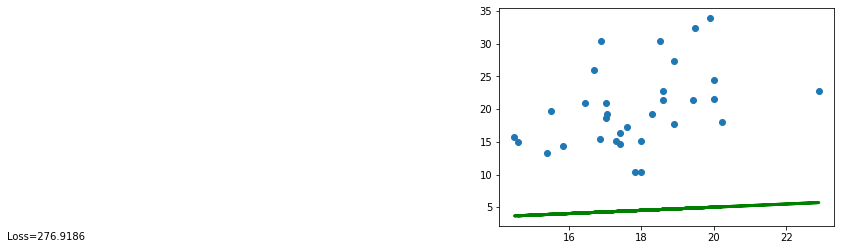

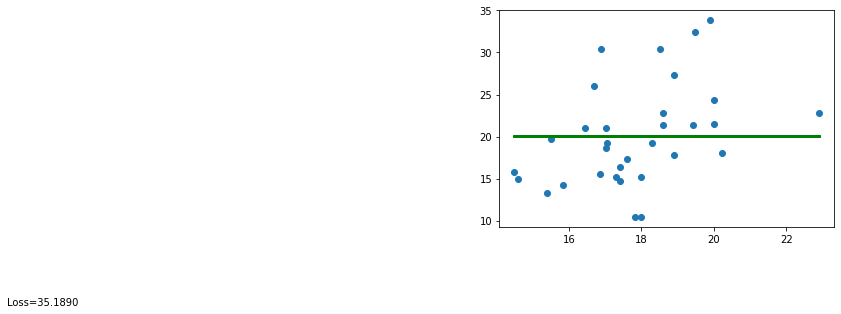

In [ ]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy())
        plt.show()
plt.ioff()

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

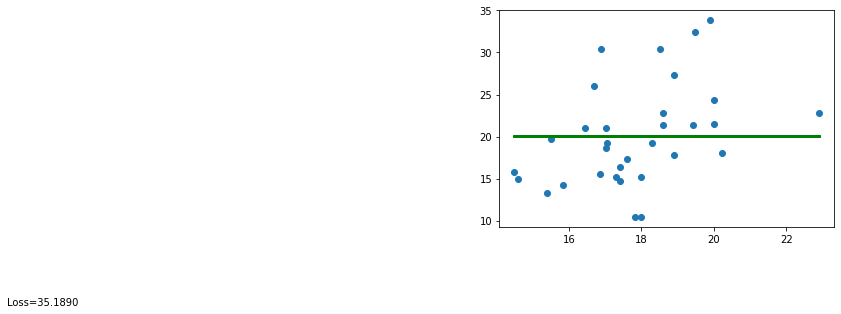

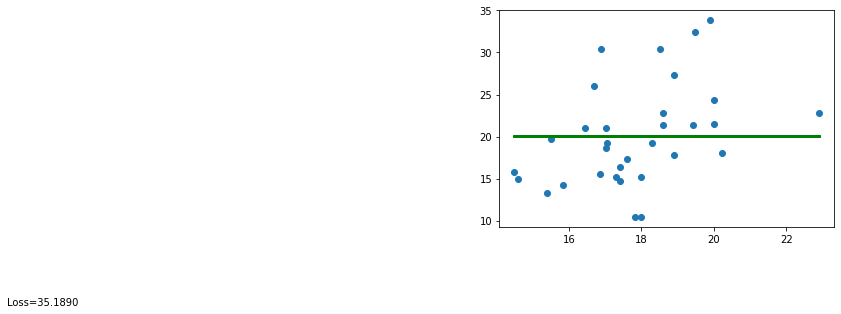

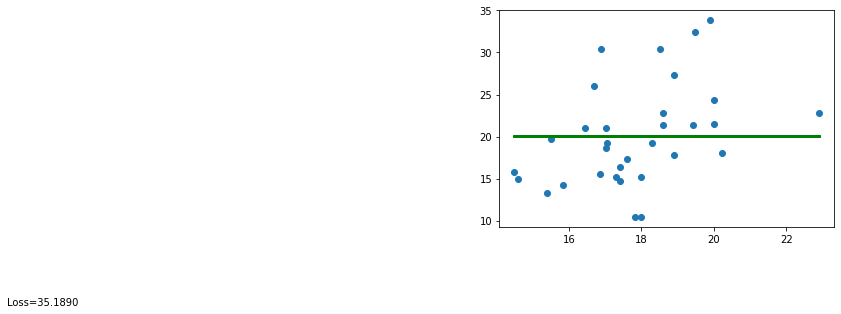

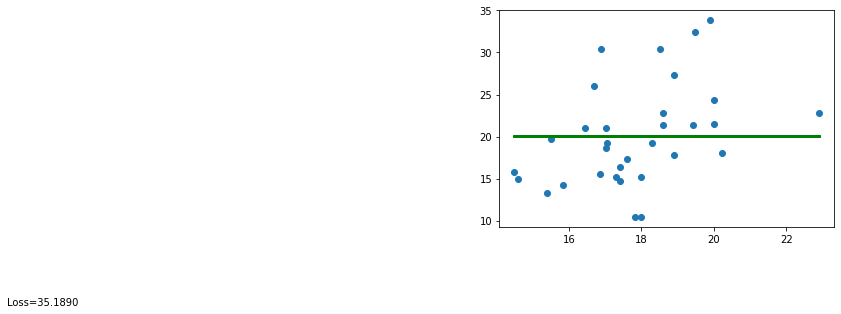

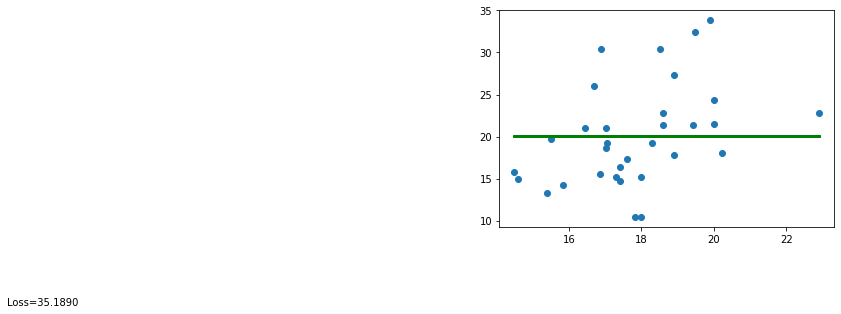

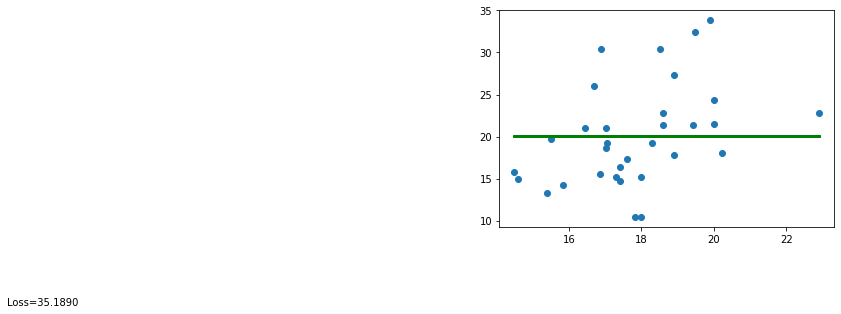

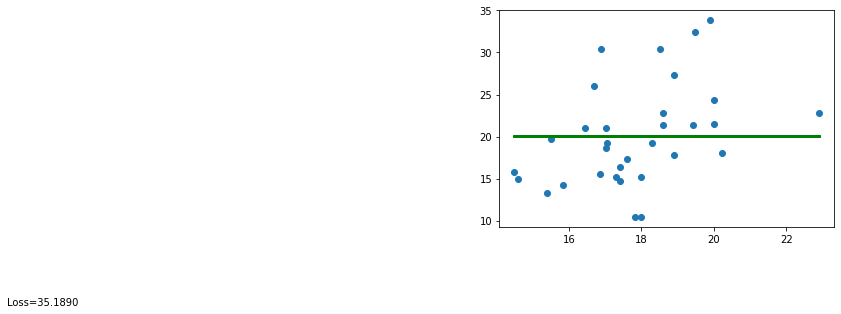

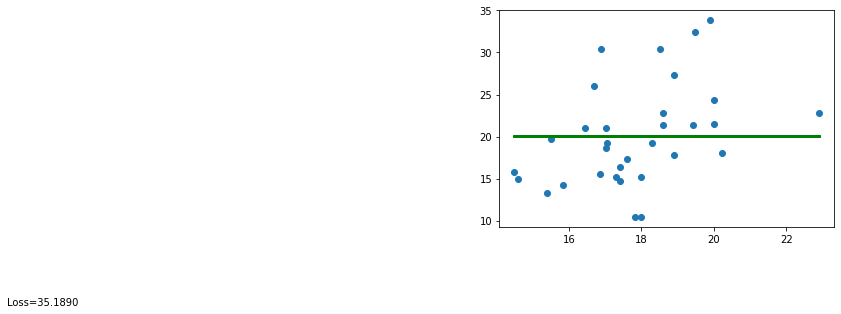

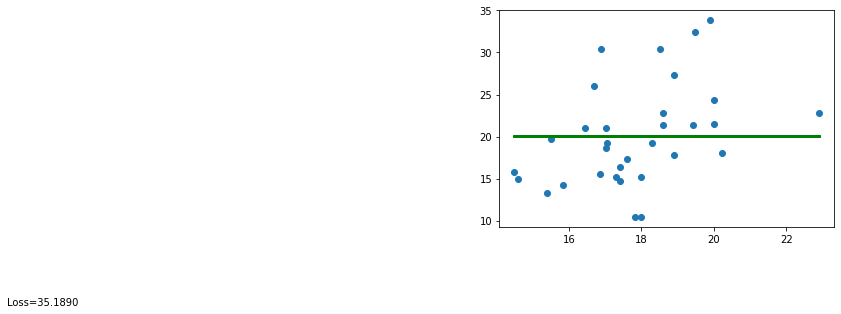

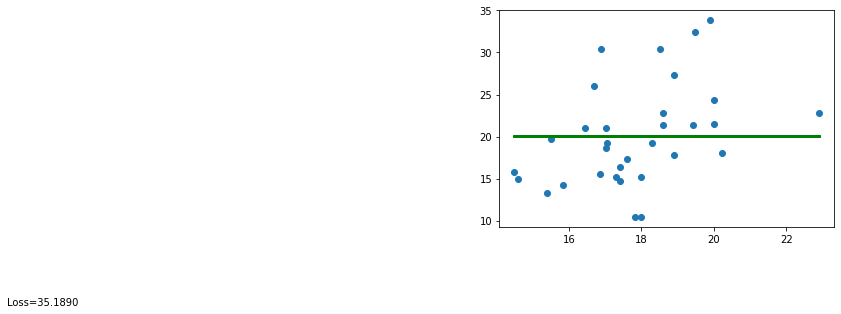

In [ ]:
for t in range(1000):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 100 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy())
        plt.show()
plt.ioff() #Turn the interactive mode off

In [ ]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
x = torch.unsqueeze(torch.from_numpy(np.array(df.mpg)),dim=1)
y = torch.unsqueeze(torch.from_numpy(np.array(df.qsec)),dim=1)

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [ ]:
plt.ion() #Turn the interactive mode on

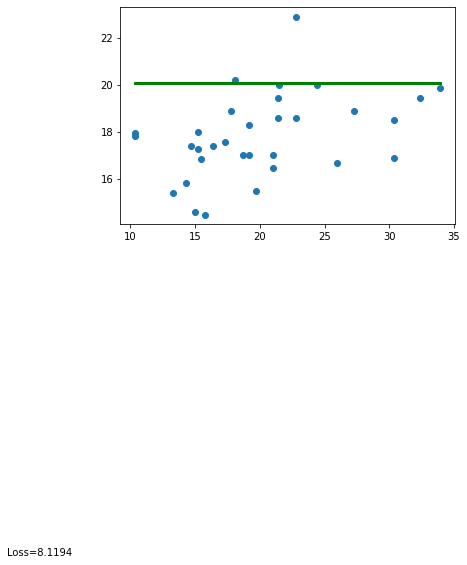

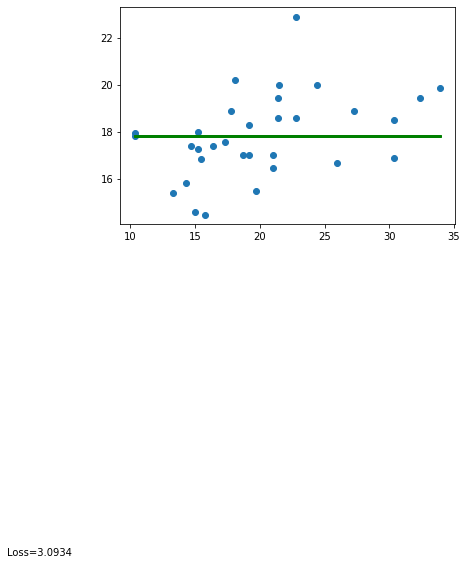

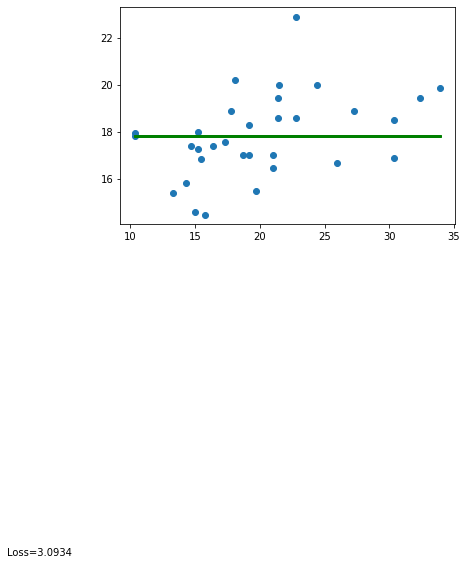

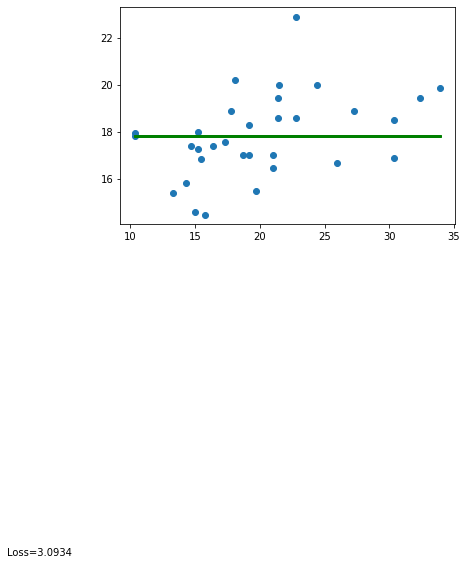

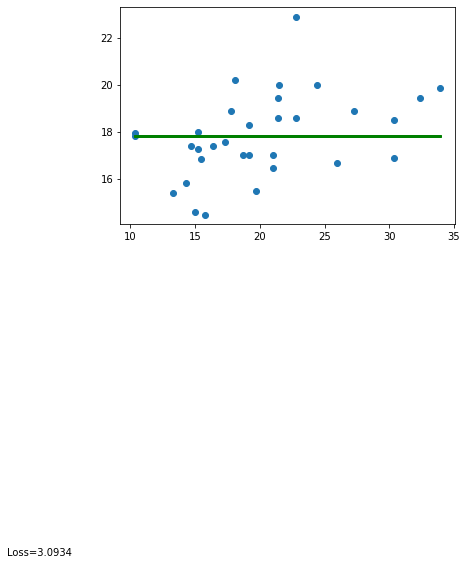

In [ ]:
for t in range(1000):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 200 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy())
        plt.show()
plt.ioff() #Turn the interactive mode off

In [ ]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim

torch.manual_seed(1)

In [4]:
# data preparation for logistic regression
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)


In [5]:
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)


In [32]:
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1), ).type(torch.LongTensor)


In [33]:
# Variable conversion
x, y = Variable(x), Variable(y)

In [34]:
# sample data prep for logistic regression model

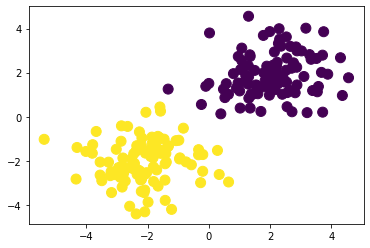

In [35]:
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1],c=y.data.numpy(),s=100)
plt.show()

In [36]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.sigmoid(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)             # linear output
        return x

In [37]:
net = Net(n_feature=2,n_hidden=10,n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [38]:
# loss and optimizer
# softmax is internally computed
# set parameters to be updated

In [39]:
#net(x)

In [40]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.02)

In [41]:
loss_func = torch.nn.CrossEntropyLoss()

In [42]:
plt.ion() # interactive graph on

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


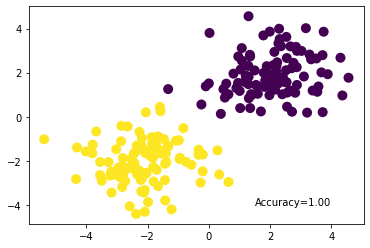

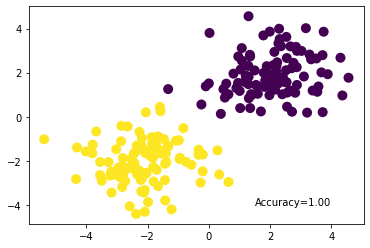

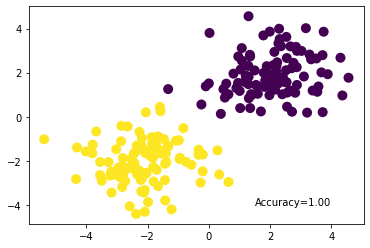

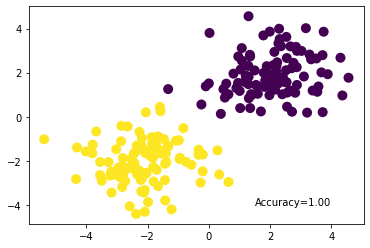

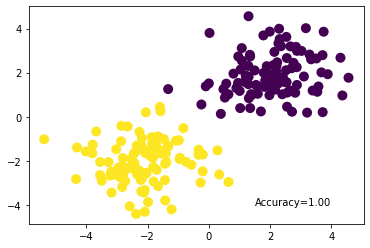

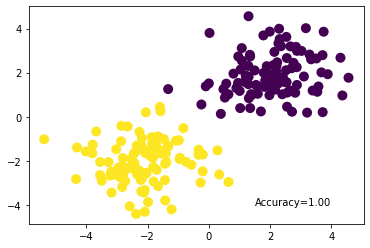

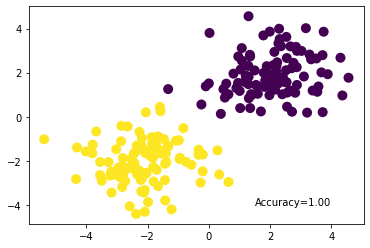

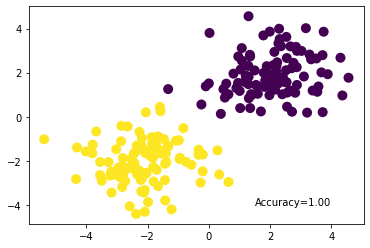

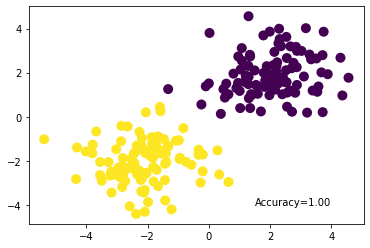

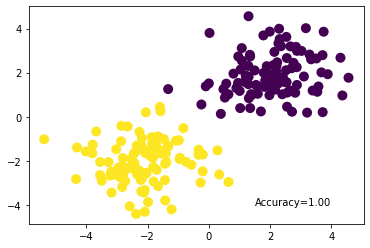

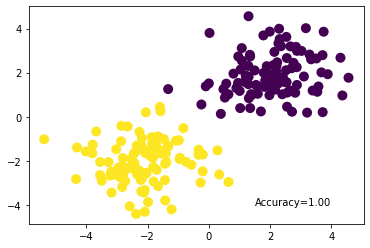

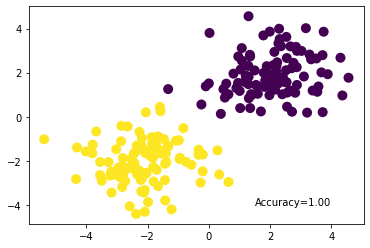

In [44]:
for t in range(100):
    out = net(x)     # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0 or t in [3,6]:
        # plot and show learning process
        plt.cla()
        _,prediction = torch.max(F.softmax(out),1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],
                    x.data.numpy()[:,1],
                    c = pred_y,s=100,lw=0)
        accuracy = sum(pred_y == target_y)/200.0
        #plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy)
        plt.show()
plt.ioff() #Turn the interactive mode off